In [1]:
import numpy as np
import matplotlib.pyplot as plt

# UDF

In [2]:
#生成線性資料
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2)) #從[0, 1]取出
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

#生成XOR資料
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
    
    return np.array(inputs), np.array(labels).reshape(21, 1)

#把結果列印出來
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if round(float(pred_y[i])) == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

#準確率計算    
def accuracy(x, y, n):
    total = 0
    for i in range(len(x)):
        bias = x[i] - y[i]
        total += abs(bias)
    return 1 - float(total / n)

In [3]:
x3, y3 = generate_linear(n=10)

In [10]:
x3[:1]


array([[0.59388597, 0.34858075]])

In [11]:
x3[1:]

array([[0.21145285, 0.70671326],
       [0.80443073, 0.87044813],
       [0.60269799, 0.30150399],
       [0.35218063, 0.08990763],
       [0.37937289, 0.36044517],
       [0.93148632, 0.57826462],
       [0.30781717, 0.86765793],
       [0.80435205, 0.76601061],
       [0.34353573, 0.86469776]])

In [7]:
x3[:]

array([[0.59388597, 0.34858075],
       [0.21145285, 0.70671326],
       [0.80443073, 0.87044813],
       [0.60269799, 0.30150399],
       [0.35218063, 0.08990763],
       [0.37937289, 0.36044517],
       [0.93148632, 0.57826462],
       [0.30781717, 0.86765793],
       [0.80435205, 0.76601061],
       [0.34353573, 0.86469776]])

# 設置初始值

In [16]:
x1, y1 = generate_linear(n=10)
x2, y2 = generate_XOR_easy()

In [19]:
print (x1)
print ("\n")
print (y1)

[[0.16656284 0.0059225 ]
 [0.46248447 0.12175872]
 [0.8383795  0.41969786]
 [0.61216517 0.90217213]
 [0.5714587  0.02015104]
 [0.83974911 0.20007378]
 [0.74595348 0.68302444]
 [0.53763976 0.0842499 ]
 [0.68055076 0.32323706]
 [0.57479537 0.01778748]]


[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# 設置初始weight

In [24]:
inputSize = 2
outputSize = 1
hiddenSize = 3

#初始權重(這邊這樣設計是為了讓其遵守行列式乘法規則左邊矩陣n行=右邊矩陣m列)
W1 = np.random.randn(inputSize, hiddenSize) 
W2 = np.random.randn(hiddenSize, outputSize) 

W3 =  np.random.randn(2, 2) 

In [25]:
#m列n行
print ("initial weight 1 is ("+str(inputSize)+"*"+str(hiddenSize)+" matrix) : ")
print (W1)
print ('\n')
print ("initial weight 2 is ("+str(hiddenSize)+"*"+str(outputSize)+" matrix) : ")
print (W2)

initial weight 1 is (2*3 matrix) : 
[[-0.78444725 -0.67602865  0.342683  ]
 [-0.82885253 -0.08055822  1.10454513]]


initial weight 2 is (3*1 matrix) : 
[[ 0.5062091 ]
 [-0.55557648]
 [ 0.78725691]]


# forward (with sigmoid)

In [28]:
def sigmoid(x):
    # 激勵函數 
    return 1/(1+np.exp(-x))

In [30]:
# 矩陣相乘x1*W1 (10*2 - 2*3 ==> 10*3 matrix)
z1 = np.dot(x1, W1) 

# 用numpy實現整個matrix做exp運算
z2 = sigmoid(z1) 

# 矩陣相乘z2*W2 (10*3 - 3*1 ==> 10*1 matrix)
z = np.dot(z2, W2) 
output = sigmoid(z) 

In [40]:
print ("x1: ")
print (x1) #10*2 matrix
print ("\n")
print ("W1: ")
print (W1) #2*3 matrix
print ("\n")
print ("z1: ")
print (z1) #10*3 matrix
print ("\n")
print ("z2: ")
print (z2) #10*3 matrix
print ("\n")
print ("W2: ")
print (W2) #3*1 matrix
print ("\n")
print ("z: ")
print (z) #10*1 matrix
print ("\n")
print ("output: ")
print (output) #10*1 matrix


x1: 
[[0.16656284 0.0059225 ]
 [0.46248447 0.12175872]
 [0.8383795  0.41969786]
 [0.61216517 0.90217213]
 [0.5714587  0.02015104]
 [0.83974911 0.20007378]
 [0.74595348 0.68302444]
 [0.53763976 0.0842499 ]
 [0.68055076 0.32323706]
 [0.57479537 0.01778748]]


W1: 
[[-0.78444725 -0.67602865  0.342683  ]
 [-0.82885253 -0.08055822  1.10454513]]


z1: 
[[-0.13556864 -0.11307836  0.06361992]
 [-0.46371469 -0.32246142  0.29297357]
 [-1.00553213 -0.60057867  0.75087364]
 [-1.22797894 -0.48651857  1.20626843]
 [-0.46498145 -0.38794579  0.21808692]
 [-0.82457054 -0.58381204  0.50875826]
 [-1.1512877  -0.55930916  1.0100569 ]
 [-0.49158077 -0.3702469   0.27729782]
 [-0.80177203 -0.48611121  0.59024311]
 [-0.46563984 -0.39001106  0.21661967]]


z2: 
[[0.46615965 0.47176049 0.51589962]
 [0.38610497 0.420076   0.57272395]
 [0.26785513 0.35421131 0.67936903]
 [0.22653536 0.38071405 0.76963803]
 [0.38580475 0.40421191 0.55430666]
 [0.30479432 0.35805591 0.62451534]
 [0.24025396 0.36370732 0.73303129]
 

In [41]:
#一次forward傳播與真實輸出的比較
print ("predict output: ")
print (output) #10*1 matrix

print ("actual output: ")
print (y1) #10*1 matrix

predict output: 
[[0.59387811]
 [0.60179416]
 [0.61624427]
 [0.62458641]
 [0.60039447]
 [0.60992958]
 [0.62166832]
 [0.60181468]
 [0.61104676]
 [0.60037333]]
actual output: 
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# backpropagation

In [44]:
def sigmoidPrime(x):
    # 激勵函數微分
    return x * (1 - x)

# [計算預測誤差] error_output = y1 - output

In [42]:
print ("y1: ")
print (y1) #10*1 matrix
print ("\n")
print ("output: ")
print (output) #10*1 matrix
print ("\n")

#計算真正的y跟預測的y之間的差距
error_output = y1 - output
print ("error_output: ")
print (error_output) #10*1 matrix
print ("\n")

y1: 
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


output: 
[[0.59387811]
 [0.60179416]
 [0.61624427]
 [0.62458641]
 [0.60039447]
 [0.60992958]
 [0.62166832]
 [0.60181468]
 [0.61104676]
 [0.60037333]]


error_output: 
[[-0.59387811]
 [-0.60179416]
 [-0.61624427]
 [ 0.37541359]
 [-0.60039447]
 [-0.60992958]
 [-0.62166832]
 [-0.60181468]
 [-0.61104676]
 [-0.60037333]]




# [梯度下降] delta_output = error_output*sigmoidPrime(output) 
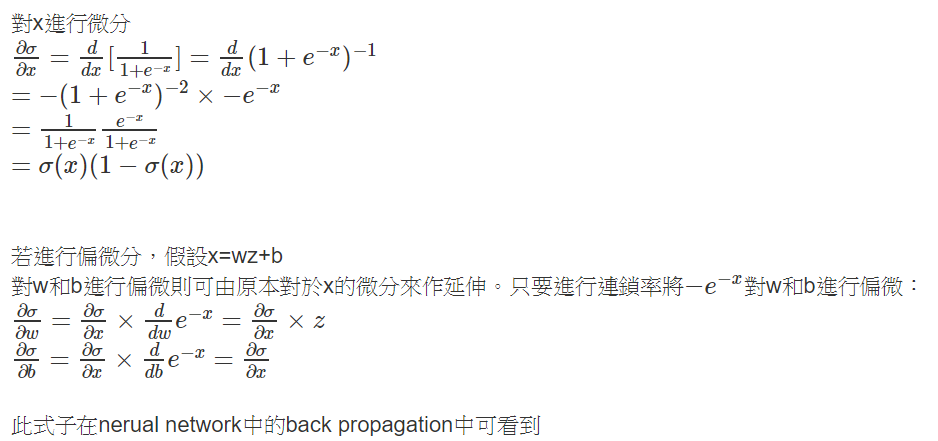

In [45]:
#把輸出微分處理，接著乘上誤差 (梯度下降)
delta_output = error_output*sigmoidPrime(output) 

print ("error_output: ")
print (error_output) #10*1 matrix
print ("\n")

#給輸出的值方向
print ("sigmoidPrime(output): ")
print (sigmoidPrime(output)) #10*1 matrix
print ("\n")

print ("delta_output = error_output*sigmoidPrime(output)  : ")
print (delta_output) #10*1 matrix
print ("\n")

error_output: 
[[-0.59387811]
 [-0.60179416]
 [-0.61624427]
 [ 0.37541359]
 [-0.60039447]
 [-0.60992958]
 [-0.62166832]
 [-0.60181468]
 [-0.61104676]
 [-0.60037333]]


sigmoidPrime(output): 
[[0.2411869 ]
 [0.23963795]
 [0.23648727]
 [0.23447823]
 [0.23992095]
 [0.23791549]
 [0.23519682]
 [0.23963377]
 [0.23766862]
 [0.23992519]]


delta_output = error_output*sigmoidPrime(output)  : 
[[-0.14323562]
 [-0.14421272]
 [-0.14573392]
 [ 0.08802631]
 [-0.14404721]
 [-0.14511169]
 [-0.14621441]
 [-0.14421512]
 [-0.14522664]
 [-0.14404469]]




# (從後面計算Z2誤差) z2_error = delta_output.dot(W2.T) 

In [51]:
#轉置矩陣
print ("W2: ")
print (W2) #3*1 matrix
print ("\n")
print ("W2.T (轉置): ")
print (W2.T) #1*3 matrix
print ("\n")

W2: 
[[ 0.5062091 ]
 [-0.55557648]
 [ 0.78725691]]


W2.T (轉置): 
[[ 0.5062091  -0.55557648  0.78725691]]




In [57]:
# 輸出的梯度下降參數
print ("delta_output: ")
print (delta_output) #10*1 matrix
print ("\n")

print ("W2.T (W2的轉置矩陣): ")
print (W2.T) #10*1 matrix
print ("\n")

print ("z2_error = delta_output.dot(W2.T)  (輸出的梯度下降參數 * W2轉置矩陣 ): ")
print (delta_output.dot(W2.T) ) #10*1 matrix
print ("\n")

delta_output: 
[[-0.14323562]
 [-0.14421272]
 [-0.14573392]
 [ 0.08802631]
 [-0.14404721]
 [-0.14511169]
 [-0.14621441]
 [-0.14421512]
 [-0.14522664]
 [-0.14404469]]


W2.T (W2的轉置矩陣): 
[[ 0.5062091  -0.55557648  0.78725691]]


z2_error = delta_output.dot(W2.T)  (輸出的梯度下降參數 * W2轉置矩陣 ): 
[[-0.07250717  0.07957834 -0.11276323]
 [-0.07300179  0.08012119 -0.11353246]
 [-0.07377184  0.08096634 -0.11473004]
 [ 0.04455972 -0.04890535  0.06929932]
 [-0.07291801  0.08002924 -0.11340216]
 [-0.07345686  0.08062064 -0.11424018]
 [-0.07401507  0.08123329 -0.11510831]
 [-0.07300301  0.08012253 -0.11353435]
 [-0.07351505  0.0806845  -0.11433067]
 [-0.07291673  0.08002784 -0.11340018]]




# [Z2梯度下降參數] z2_delta = z2_error*sigmoidPrime(z2) 

In [61]:
z2_error = delta_output.dot(W2.T)
z2_delta = z2_error*sigmoidPrime(z2) 

print ("z2_delta = Z2梯度下降參數 (z2誤差 * sigmoid微分): ")
print (z2_delta) #10*3 matrix
print ("\n")

z2_delta = Z2梯度下降參數 (z2誤差 * sigmoid微分): 
[[-0.01804376  0.01983112 -0.0281623 ]
 [-0.01730346  0.0195185  -0.02778267]
 [-0.0144673   0.0185207  -0.02499127]
 [ 0.00780762 -0.01153046  0.01228645]
 [-0.01727861  0.01927301 -0.02801609]
 [-0.01556512  0.01853081 -0.02678886]
 [-0.01351012  0.01879936 -0.02252628]
 [-0.0171911   0.01935955 -0.02784487]
 [-0.01571499  0.0190249  -0.02623094]
 [-0.01727571  0.01926503 -0.02802005]]




# (調整W1) 透過轉置x矩陣*z2微分 -  x.T.dot(z2_delta) 

In [65]:
#x1矩陣
print ("x1: ")
print (x1) #10*2 matrix
print ("\n")

#x1轉置矩陣
print ("x1.T (轉置): ")
print (x1.T) #2*10 matrix
print ("\n")

print ("z2_delta = Z2梯度下降參數 (z2誤差 * sigmoid微分): ")
print (z2_delta) #10*3 matrix
print ("\n")

x1: 
[[0.16656284 0.0059225 ]
 [0.46248447 0.12175872]
 [0.8383795  0.41969786]
 [0.61216517 0.90217213]
 [0.5714587  0.02015104]
 [0.83974911 0.20007378]
 [0.74595348 0.68302444]
 [0.53763976 0.0842499 ]
 [0.68055076 0.32323706]
 [0.57479537 0.01778748]]


x1.T (轉置): 
[[0.16656284 0.46248447 0.8383795  0.61216517 0.5714587  0.83974911
  0.74595348 0.53763976 0.68055076 0.57479537]
 [0.0059225  0.12175872 0.41969786 0.90217213 0.02015104 0.20007378
  0.68302444 0.0842499  0.32323706 0.01778748]]


z2_delta = Z2梯度下降參數 (z2誤差 * sigmoid微分): 
[[-0.01804376  0.01983112 -0.0281623 ]
 [-0.01730346  0.0195185  -0.02778267]
 [-0.0144673   0.0185207  -0.02499127]
 [ 0.00780762 -0.01153046  0.01228645]
 [-0.01727861  0.01927301 -0.02801609]
 [-0.01556512  0.01853081 -0.02678886]
 [-0.01351012  0.01879936 -0.02252628]
 [-0.0171911   0.01935955 -0.02784487]
 [-0.01571499  0.0190249  -0.02623094]
 [-0.01727571  0.01926503 -0.02802005]]




In [76]:
#調降W1的參數
print ("x1.T.dot(z2_delta)  (轉置x1 * z2調降參數): ")
print (x1.T.dot(z2_delta)) #2*10 - 10*3 => 2*3 matrix
print ("\n")

x1.T.dot(z2_delta)  (轉置x1 * z2調降參數): 
[[-0.08124773  0.0958267  -0.13520799]
 [-0.02076719  0.02492423 -0.03558731]]




In [77]:
print ("W1: ")
print (W1) #2*3 matrix
print ("\n")

print ("x1.T.dot(z2_delta)  (轉置x1 * z2調降參數): ")
print (x1.T.dot(z2_delta)) #2*10 - 10*3 => 2*3 matrix
print ("\n")

#因為是y-output, 所以下面W用+= | 如果是output-y, 下面W用-=
print ("new W1 : W1 += x.T.dot(z2_delta)   (轉置x1 * z2調降參數): ")
print (W1 + x1.T.dot(z2_delta) ) 
print ("\n")


W1: 
[[-0.78444725 -0.67602865  0.342683  ]
 [-0.82885253 -0.08055822  1.10454513]]


x1.T.dot(z2_delta)  (轉置x1 * z2調降參數): 
[[-0.08124773  0.0958267  -0.13520799]
 [-0.02076719  0.02492423 -0.03558731]]


new W1 : W1 += x.T.dot(z2_delta)   (轉置x1 * z2調降參數): 
[[-0.86569498 -0.58020195  0.20747501]
 [-0.84961972 -0.05563399  1.06895782]]




# (調整W2) 透過轉置z2矩陣*output(predic y)微分 -  x.T.dot(z2_delta) 

In [75]:
print ("W2: ")
print (W2) #2*3 matrix
print ("\n")

print ("z2.T.dot(delta_output)  (轉置z2 * output y hat微分): ")
print (z2.T.dot(delta_output)) #2*10 - 10*3 => 2*3 matrix
print ("\n")

#因為是y-output, 所以下面W用+= | 如果是output-y, 下面W用-=
print ("new W2 : W2 += z2.T.dot(delta_output)   (轉置z2 * output y hat 微分): ")
print (W2 + z2.T.dot(delta_output) ) 
print ("\n")

W2: 
[[ 0.5062091 ]
 [-0.55557648]
 [ 0.78725691]]


z2.T.dot(delta_output)  (轉置z2 * output y hat微分): 
[[-0.43173062]
 [-0.48198982]
 [-0.72067473]]


new W2 : W2 += z2.T.dot(delta_output)   (轉置z2 * output y hat 微分): 
[[ 0.07447847]
 [-1.0375663 ]
 [ 0.06658218]]


